# TP1 - Vision por computadora 1

Integrantes:
- Legajo: xxxx - Nombre: Isidro Marco Joel
- Legajo: xxxx - Nombre: Sarina Diego

## Parte 1

Con las imágenes en /white_patch y /coord_cromaticas:
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [39]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Coordenadas cromáticas

A continuación se muestra el código que implementa el algoritmo de pasaje a coordenadas cromáticas y se muestra el resultado obtenido sobre las imágenes de la carpeta /coord_cromaticas.

In [49]:
Images_Original = []

for i in range(1, 4):
    print(f'CoordCrom_{i}.png')
    Images_Original.append(cv.imread(f'enunciado/coord_cromaticas/CoordCrom_{i}.png'))


CoordCrom_1.png
CoordCrom_2.png
CoordCrom_3.png


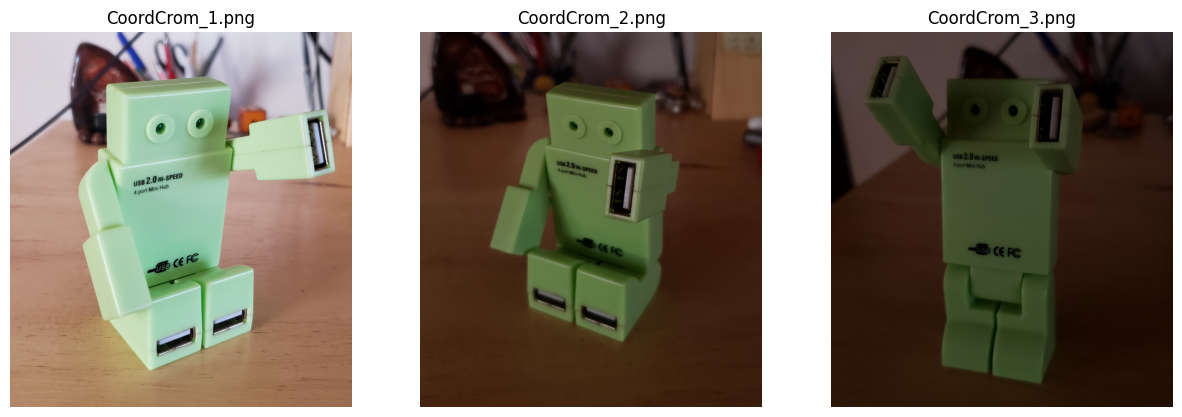

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axs):
    ax.imshow(cv.cvtColor(Images_Original[i], cv.COLOR_BGR2RGB))
    ax.set_title(f'CoordCrom_{i+1}.png')
    ax.axis('off')

plt.show()

In [44]:
def get_coord_cromaticas(image):
    # Cargar la imagen con OpenCV
    image = image.astype(float)

    # Separar los canales R, G, B
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]

    # Calcular la suma de R, G, B en cada pixel
    suma = R + G + B

    # Prevenir división por cero
    suma[suma == 0] = 1

    # Calcular coordenadas cromáticas
    r = R / suma
    g = G / suma
    b = B / suma

    return np.stack((r, g, b), axis=-1)

In [51]:
Images_CoordCrom = []

for imagen in Images_Original:
    Images_CoordCrom.append(get_coord_cromaticas(imagen))

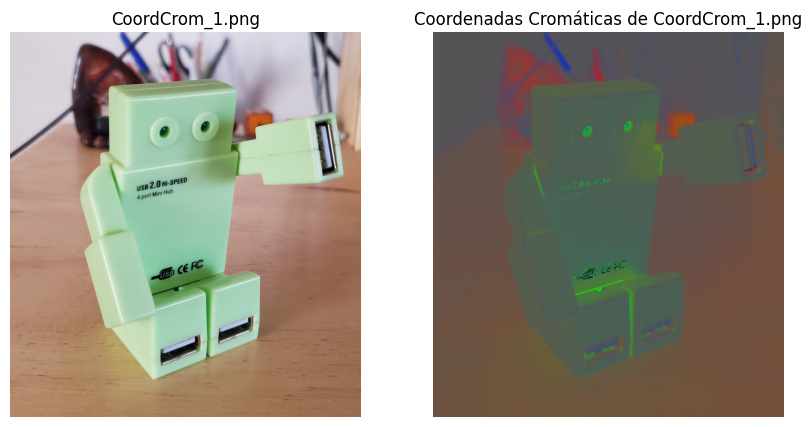

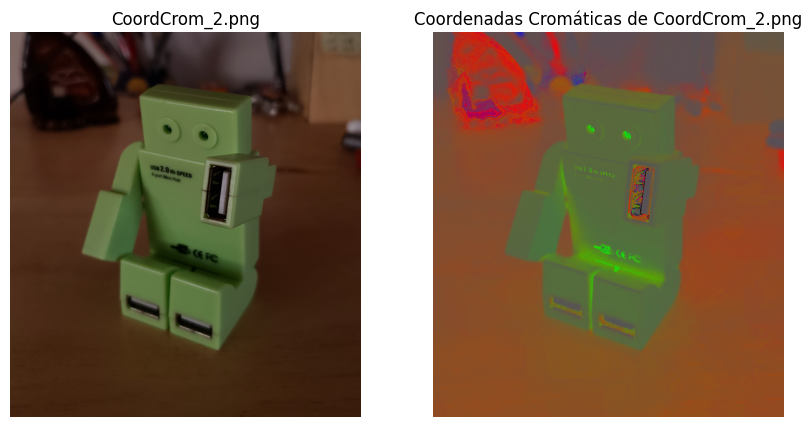

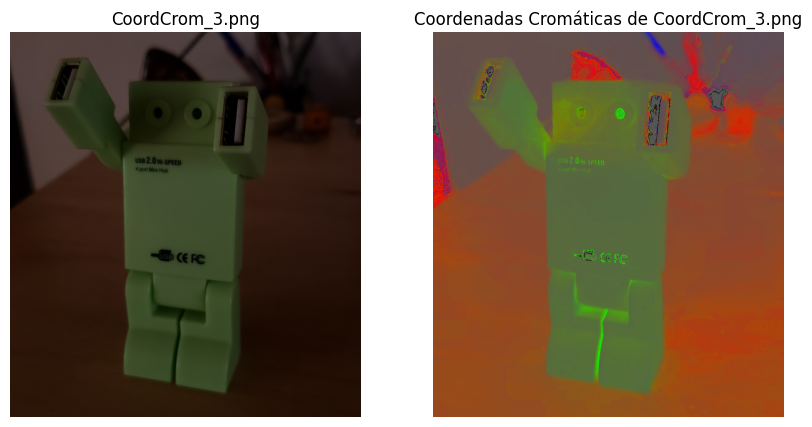

In [52]:
# graficar la comparación entre las originales y las coordenadas cromáticas
for i in range(3):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv.cvtColor(Images_Original[i].astype(np.uint8), cv.COLOR_BGR2RGB))
    axs[0].set_title(f'CoordCrom_{i+1}.png')
    axs[0].axis('off')

    axs[1].imshow(Images_CoordCrom[i][:, :, ::-1])
    axs[1].set_title(f'Coordenadas Cromáticas de CoordCrom_{i+1}.png')
    axs[1].axis('off')

    plt.show()


### White Patch

A continuación se muestra el código que implementa el algoritmo White Patch y se muestra el resultado obtenido sobre las imágenes de la carpeta /white_patch. Además, se analizan las posibles fallas en el caso de White Patch.

In [58]:
Images_test_Original = []
Paths_test_Original = ['test_blue.png', 'test_green.png', 'test_red.png']

Images_wp_Original = []
Paths_wp_Original = ['wp_blue.jpg', 'wp_green.png', 'wp_green2.jpg', 'wp_red.png', 'wp_red2.jpg']

for path in Paths_test_Original:
    Images_test_Original.append(cv.imread(f'enunciado/white_patch/{path}'))

for path in Paths_wp_Original:
    Images_wp_Original.append(cv.imread(f'enunciado/white_patch/{path}'))

In [71]:
def get_white_patch(image):
    # Cargar la imagen con OpenCV
    image = image.astype(float)

    # Separar los canales R, G, B
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]

    # Calcular el valor máximo en cada canal
    max_R = np.max(R)
    max_G = np.max(G)
    max_B = np.max(B)

    # Calcular el factor de escala
    scale_R = 255 / max_R
    scale_G = 255 / max_G
    scale_B = 255 / max_B

    # Escalar los canales
    R = R * scale_R
    G = G * scale_G
    B = B * scale_B

    return np.stack((R, G, B), axis=-1)

In [72]:
Images_test_WhiteP = []
Images_wp_WhiteP = []

for imagen in Images_test_Original:
    Images_test_WhiteP.append(get_white_patch(imagen))

for imagen in Images_wp_Original:
    Images_wp_WhiteP.append(get_white_patch(imagen))

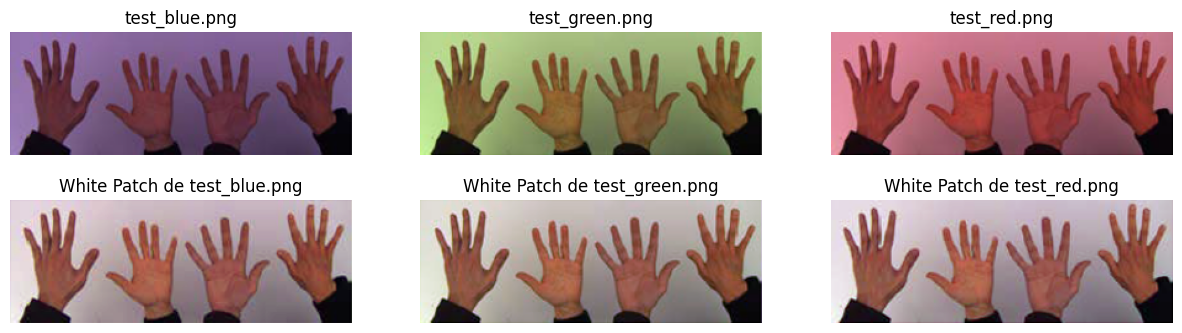

In [73]:
# graficar la comparación entre las originales y las coordenadas cromáticas en una sola figura
fig, axs = plt.subplots(2, 3, figsize=(15, 4))
for i in range(3):
    axs[0, i].imshow(cv.cvtColor(Images_test_Original[i].astype(np.uint8), cv.COLOR_BGR2RGB))
    axs[0, i].set_title(f'{Paths_test_Original[i]}')
    axs[0, i].axis('off')

    axs[1, i].imshow(Images_test_WhiteP[i][:, :, ::-1].astype(np.uint8))
    axs[1, i].set_title(f'White Patch de {Paths_test_Original[i]}')
    axs[1, i].axis('off')

plt.show()

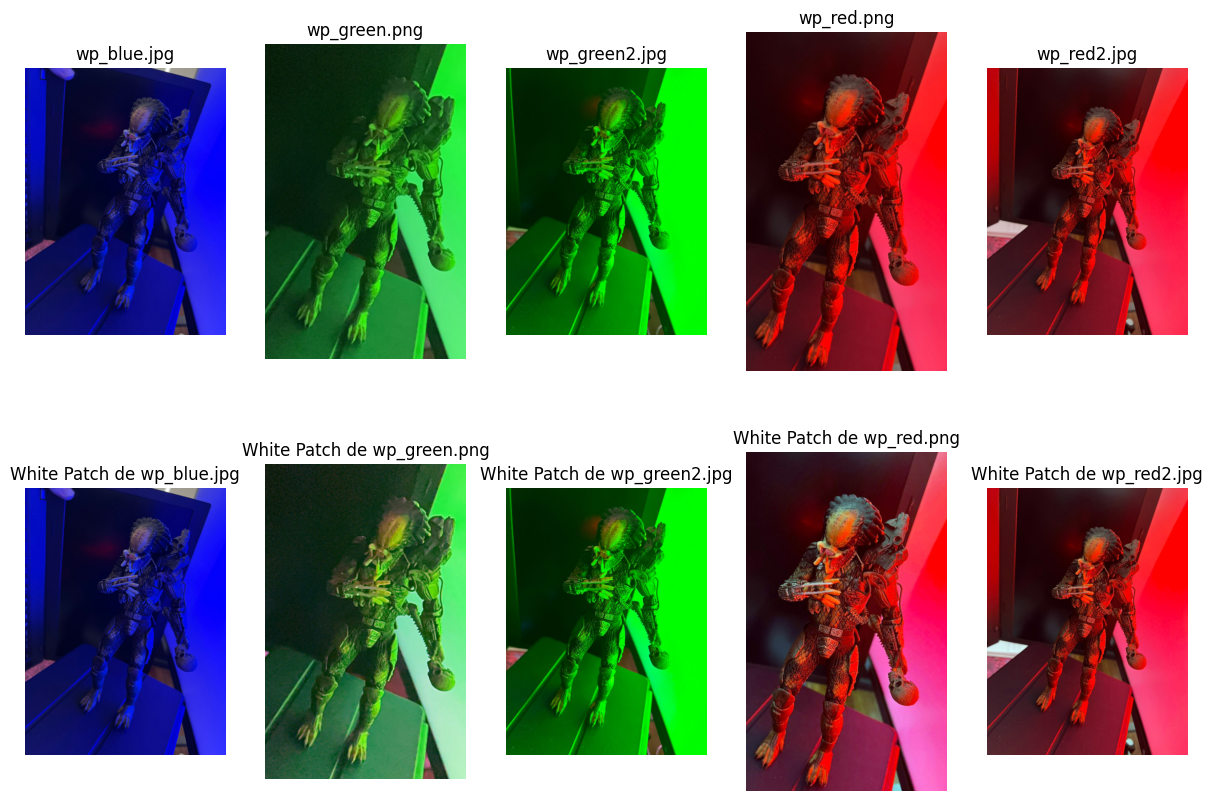

In [75]:
fig, axs = plt.subplots(2, 5, figsize=(15, 10))
for i in range(5):
    axs[0, i].imshow(cv.cvtColor(Images_wp_Original[i].astype(np.uint8), cv.COLOR_BGR2RGB))
    axs[0, i].set_title(f'{Paths_wp_Original[i]}')
    axs[0, i].axis('off')

    axs[1, i].imshow(Images_wp_WhiteP[i][:, :, ::-1].astype(np.uint8))
    axs[1, i].set_title(f'White Patch de {Paths_wp_Original[i]}')
    axs[1, i].axis('off')

plt.show()

análisis ...

## Parte 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.


In [77]:
# cargar imagenes en escala de grises
Images_Gray = []
Paths_Gray = ['img1_tp.png', 'img2_tp.png']

for path in Paths_Gray:
    Images_Gray.append(cv.imread(f'enunciado/{path}', cv.IMREAD_GRAYSCALE))

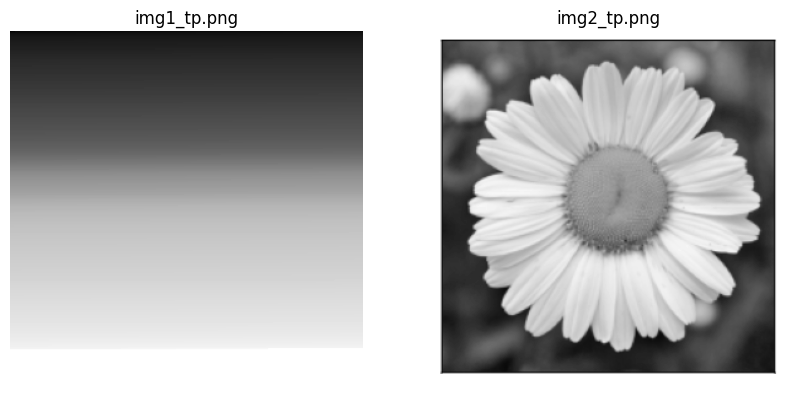

In [78]:
# graficar las imágenes en escala de grises
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    axs[i].imshow(Images_Gray[i], cmap='gray')
    axs[i].set_title(f'{Paths_Gray[i]}')
    axs[i].axis('off')

plt.show()